#### Setup

In [1]:
%pip install -r  Requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Cougar Basketball Visualization Project
## By John Salmon

### The information for this project was acquired from sports reference. The data set and more information about it can be found [here](https://www.sports-reference.com/cbb/schools/washington-state/men/2024.html).

The goal of this project is to create interesting and insightful visualization about the WSU Men's basketball team's 2023-2024 season.

#### Import Data

In [2]:
import pandas as pd
gamelog = pd.read_csv('CougarBBallStats/gamelog.csv', index_col = 'G')
gamelog.head()

,Date,Unnamed: 2,Opp,W/L,Tm,Opp.1,FG,FGA,FG%,3P,...,OPP_FT,OPP_FTA,OPP_FT%,OPP_ORB,OPP_TRB,OPP_AST,OPP_STL,OPP_BLK,OPP_TOV,OPP_PF
G,,,,,,,,,,,,,,,,,,,,,
1,2023-11-06,NaN,Idaho,W,84,59,31,57,0.544,7,...,18,25,0.720,5,23,8,6,4,11,23
2,2023-11-10,NaN,Prairie View,W,83,65,30,56,0.536,4,...,15,21,0.714,8,23,8,6,1,10,21
3,2023-11-18,N,Mississippi State,L,64,76,24,59,0.407,7,...,21,25,0.840,5,33,7,10,2,8,13
4,2023-11-19,N,Rhode Island,W,78,57,33,64,0.516,3,...,10,12,0.833,4,23,9,1,2,11,18
5,2023-11-24,NaN,Utah Tech,W,93,53,32,57,0.561,15,...,12,17,0.706,9,27,7,5,4,16,20


#### Cleaning

In [3]:
print(gamelog.columns)
print(gamelog.shape)

Index(['Date', 'Unnamed: 2', 'Opp', 'W/L', 'Tm', 'Opp.1', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'Unnamed: 23', 'OPP_FG', 'OPP_FGA', 'OPP_FG%',
       'OPP_3P', 'OPP_3PA', 'OPP_3P%', 'OPP_FT', 'OPP_FTA', 'OPP_FT%',
       'OPP_ORB', 'OPP_TRB', 'OPP_AST', 'OPP_STL', 'OPP_BLK', 'OPP_TOV',
       'OPP_PF'],
      dtype='object')
(35, 39)


In [4]:
#Fix Missing Column Names
gamelog.rename(columns = {'Unnamed: 2': 'Location'}, inplace = True)
gamelog.drop(columns = ['Unnamed: 23'], inplace = True) #Column is empty and used for spacing

#fix nan values in Location column
gamelog['Location'] = gamelog['Location'].fillna('H')

In [5]:
#Column Wise null and na counts
print('Null Count: ', gamelog.isnull().sum())
print('NA Count: ', gamelog.isna().sum())

Null Count:  Date        0
Location    0
Opp         0
W/L         0
Tm          0
Opp.1       0
FG          0
FGA         0
FG%         0
3P          0
3PA         0
3P%         0
FT          0
FTA         0
FT%         0
ORB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
OPP_FG      0
OPP_FGA     0
OPP_FG%     0
OPP_3P      0
OPP_3PA     0
OPP_3P%     0
OPP_FT      0
OPP_FTA     0
OPP_FT%     0
OPP_ORB     0
OPP_TRB     0
OPP_AST     0
OPP_STL     0
OPP_BLK     0
OPP_TOV     0
OPP_PF      0
dtype: int64
NA Count:  Date        0
Location    0
Opp         0
W/L         0
Tm          0
Opp.1       0
FG          0
FGA         0
FG%         0
3P          0
3PA         0
3P%         0
FT          0
FTA         0
FT%         0
ORB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
OPP_FG      0
OPP_FGA     0
OPP_FG%     0
OPP_3P      0
OPP_3PA     0
OPP_3P%     0
OPP_FT      0
OPP_FTA     0
OPP_FT%    

In [6]:
#Column wise data type correction
print('Data Types: ', gamelog.dtypes)

cols_to_convert = ['']

Data Types:  Date         object
Location     object
Opp          object
W/L          object
Tm            int64
Opp.1         int64
FG            int64
FGA           int64
FG%         float64
3P            int64
3PA           int64
3P%         float64
FT            int64
FTA           int64
FT%         float64
ORB           int64
TRB           int64
AST           int64
STL           int64
BLK           int64
TOV           int64
PF            int64
OPP_FG        int64
OPP_FGA       int64
OPP_FG%     float64
OPP_3P        int64
OPP_3PA       int64
OPP_3P%     float64
OPP_FT        int64
OPP_FTA       int64
OPP_FT%     float64
OPP_ORB       int64
OPP_TRB       int64
OPP_AST       int64
OPP_STL       int64
OPP_BLK       int64
OPP_TOV       int64
OPP_PF        int64
dtype: object


#### Feature Engineering

In [7]:
#Score Difference Column
gamelog['Victory Margin'] = gamelog['Tm'] - gamelog['Opp.1']

#add team column for later
gamelog['Team'] = 'WSU'

#### Data Exploration

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

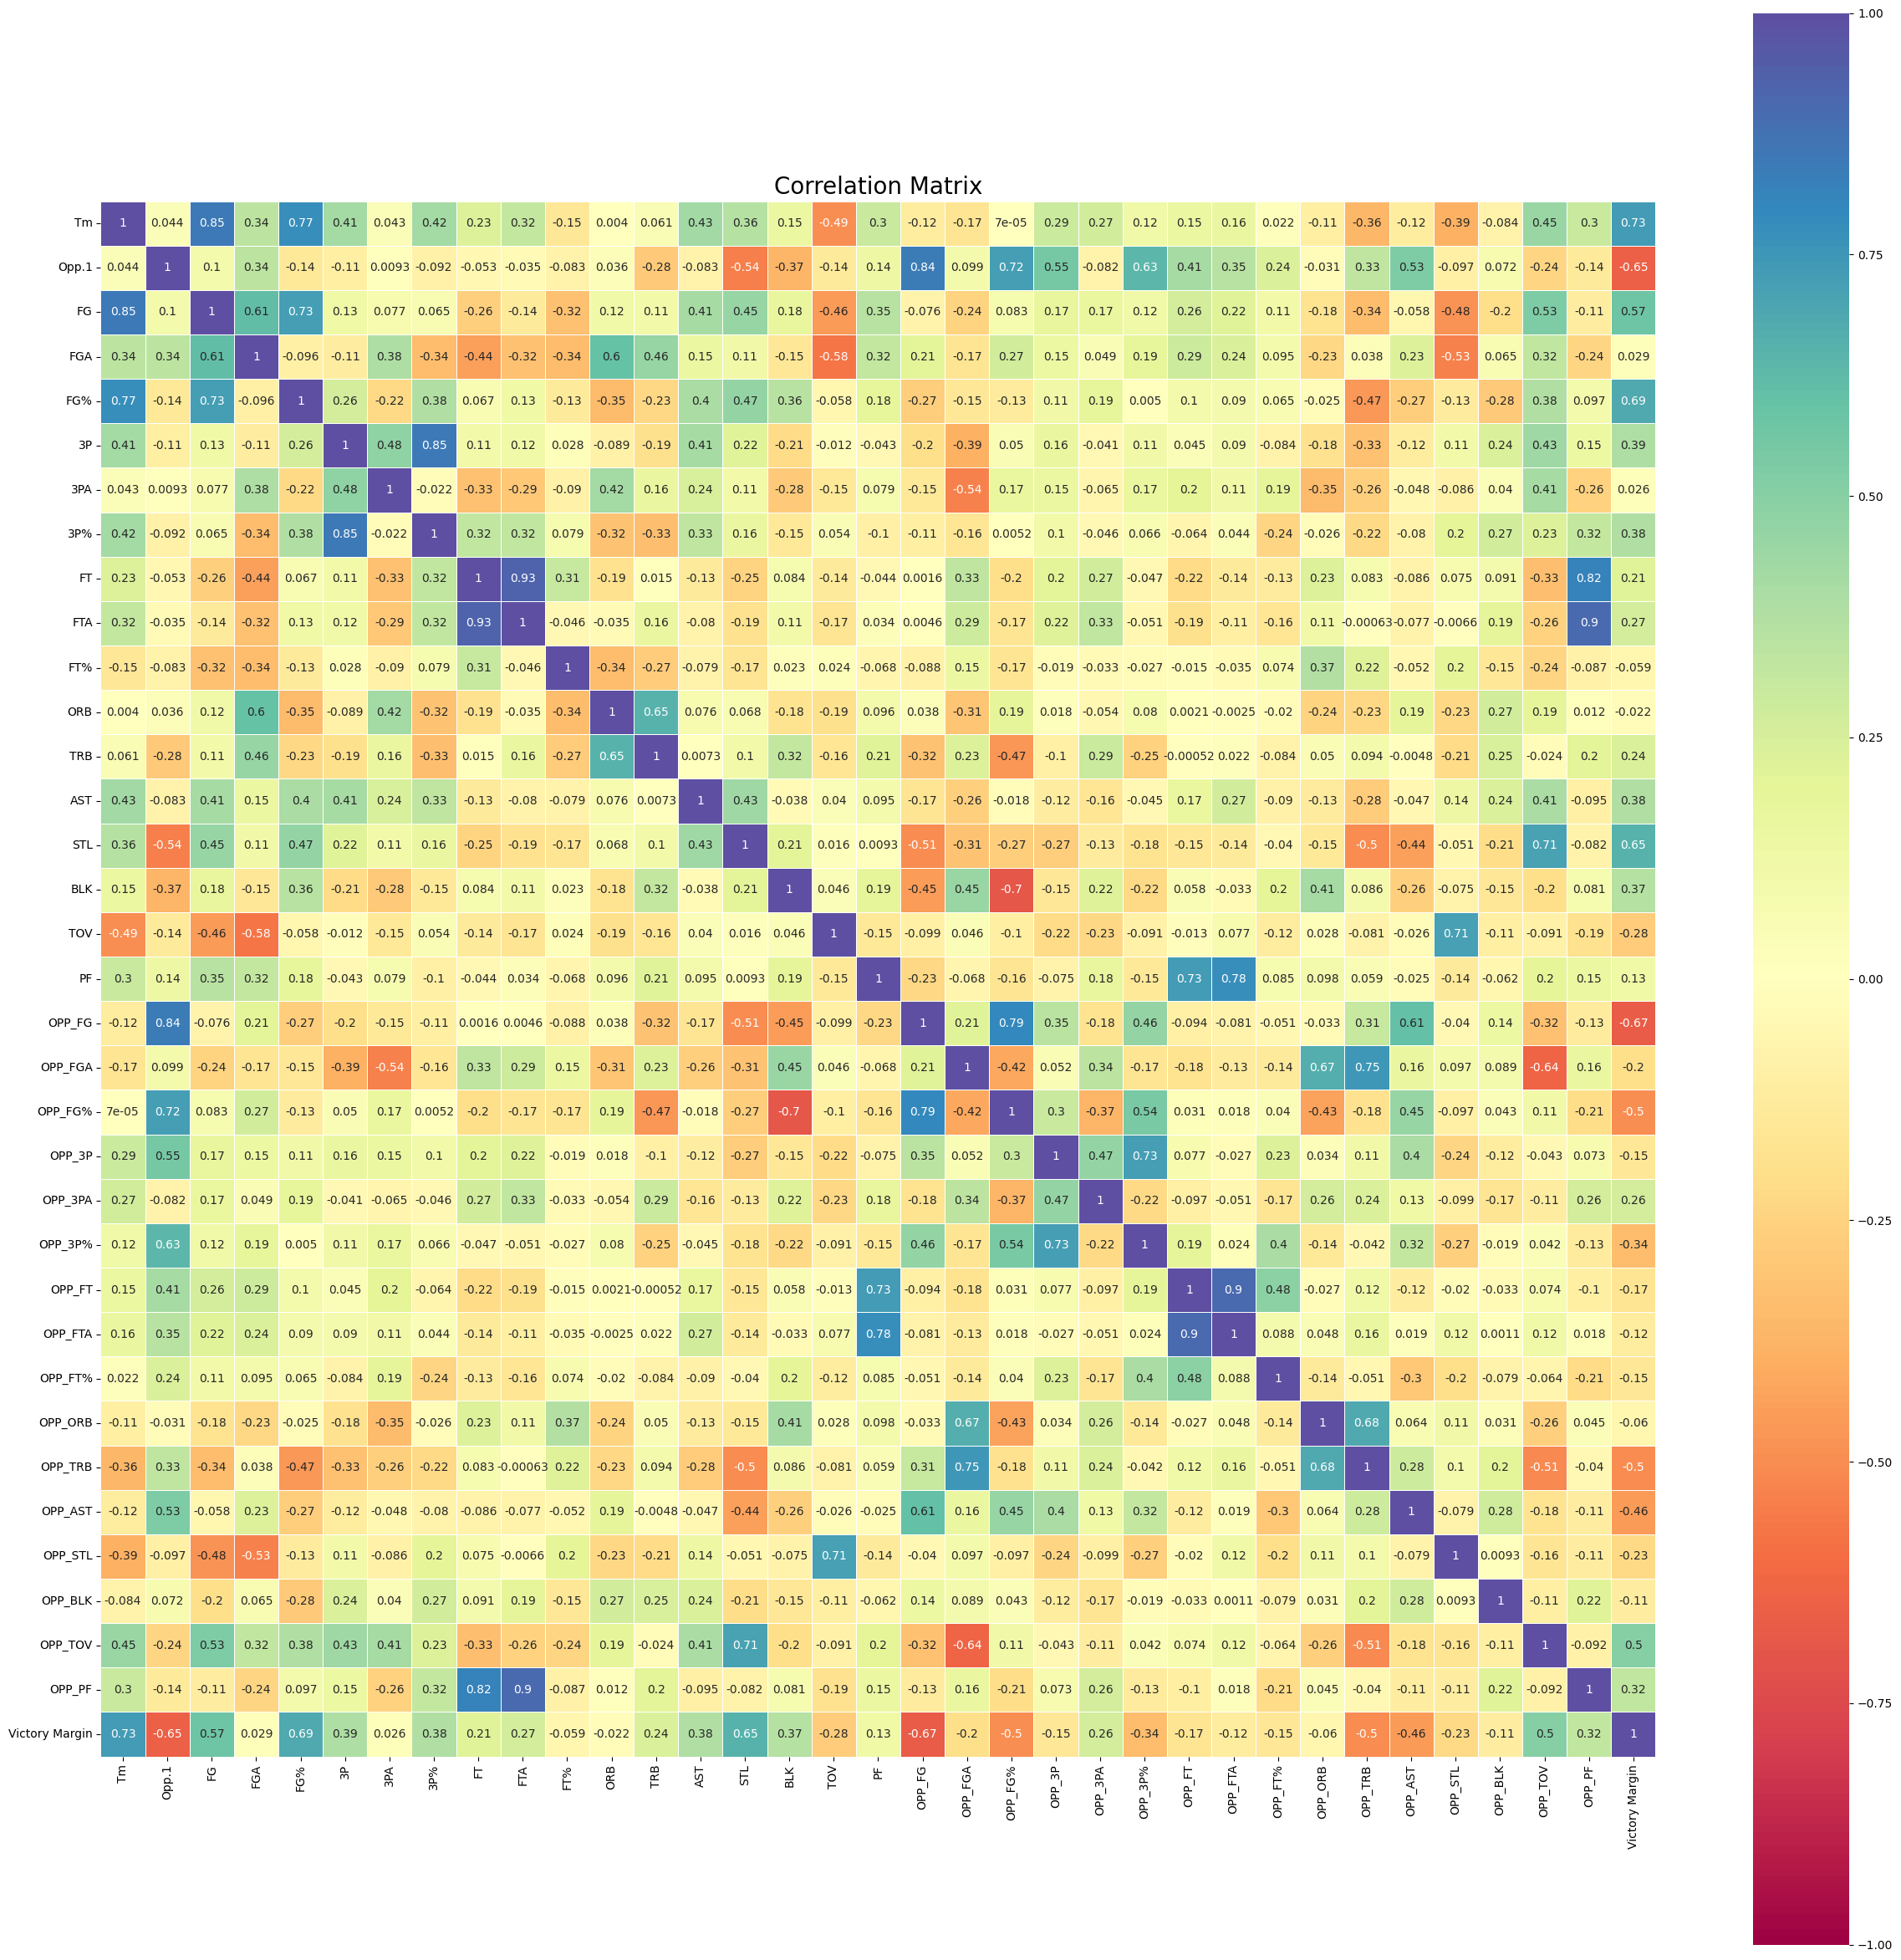

In [9]:
#Correlation Matrix
corr = gamelog.select_dtypes(include = ['int64', 'float64']).corr()

plt.figure(figsize = (30, 30))
sns.heatmap(corr,
            annot = True,
            cmap = 'Spectral',
            vmin = -1, vmax = 1,
            square = True,
            linewidths = 0.5)
plt.title('Correlation Matrix', fontsize = 20)
plt.show

This correlation matrix looks really cool and tells us some interesting things, but its important to remember that these correlations do not mean that these factors are having an effect on others, instead it means there is a possible link between the two.

/var/folders/x7/08r503x15pz0twd7l5v9p7yh0000gn/T/ipykernel_25506/2582458032.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gamelog['Victory Margin'], color = 'crimson', bins = 35, hist_kws = {'alpha': 0.5})


<Axes: xlabel='Victory Margin', ylabel='Density'>

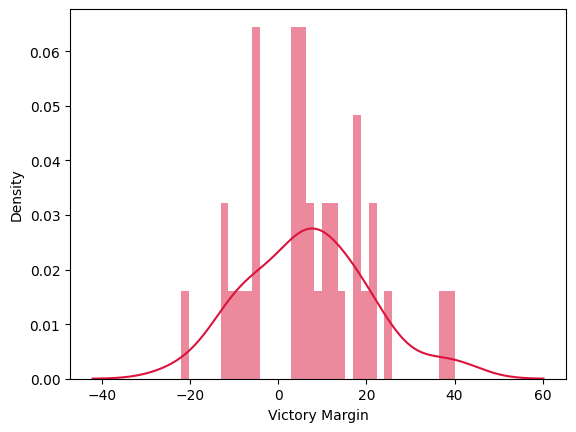

In [10]:
#distplot of victory margin
sns.distplot(gamelog['Victory Margin'], color = 'crimson', bins = 35, hist_kws = {'alpha': 0.5})

array([[<Axes: title={'center': 'Tm'}>,
        <Axes: title={'center': 'Opp.1'}>,
        <Axes: title={'center': 'FG'}>, <Axes: title={'center': 'FGA'}>,
        <Axes: title={'center': 'FG%'}>, <Axes: title={'center': '3P'}>],
       [<Axes: title={'center': '3PA'}>, <Axes: title={'center': '3P%'}>,
        <Axes: title={'center': 'FT'}>, <Axes: title={'center': 'FTA'}>,
        <Axes: title={'center': 'FT%'}>, <Axes: title={'center': 'ORB'}>],
       [<Axes: title={'center': 'TRB'}>, <Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'STL'}>, <Axes: title={'center': 'BLK'}>,
        <Axes: title={'center': 'TOV'}>, <Axes: title={'center': 'PF'}>],
       [<Axes: title={'center': 'OPP_FG'}>,
        <Axes: title={'center': 'OPP_FGA'}>,
        <Axes: title={'center': 'OPP_FG%'}>,
        <Axes: title={'center': 'OPP_3P'}>,
        <Axes: title={'center': 'OPP_3PA'}>,
        <Axes: title={'center': 'OPP_3P%'}>],
       [<Axes: title={'center': 'OPP_FT'}>,
        <Axes

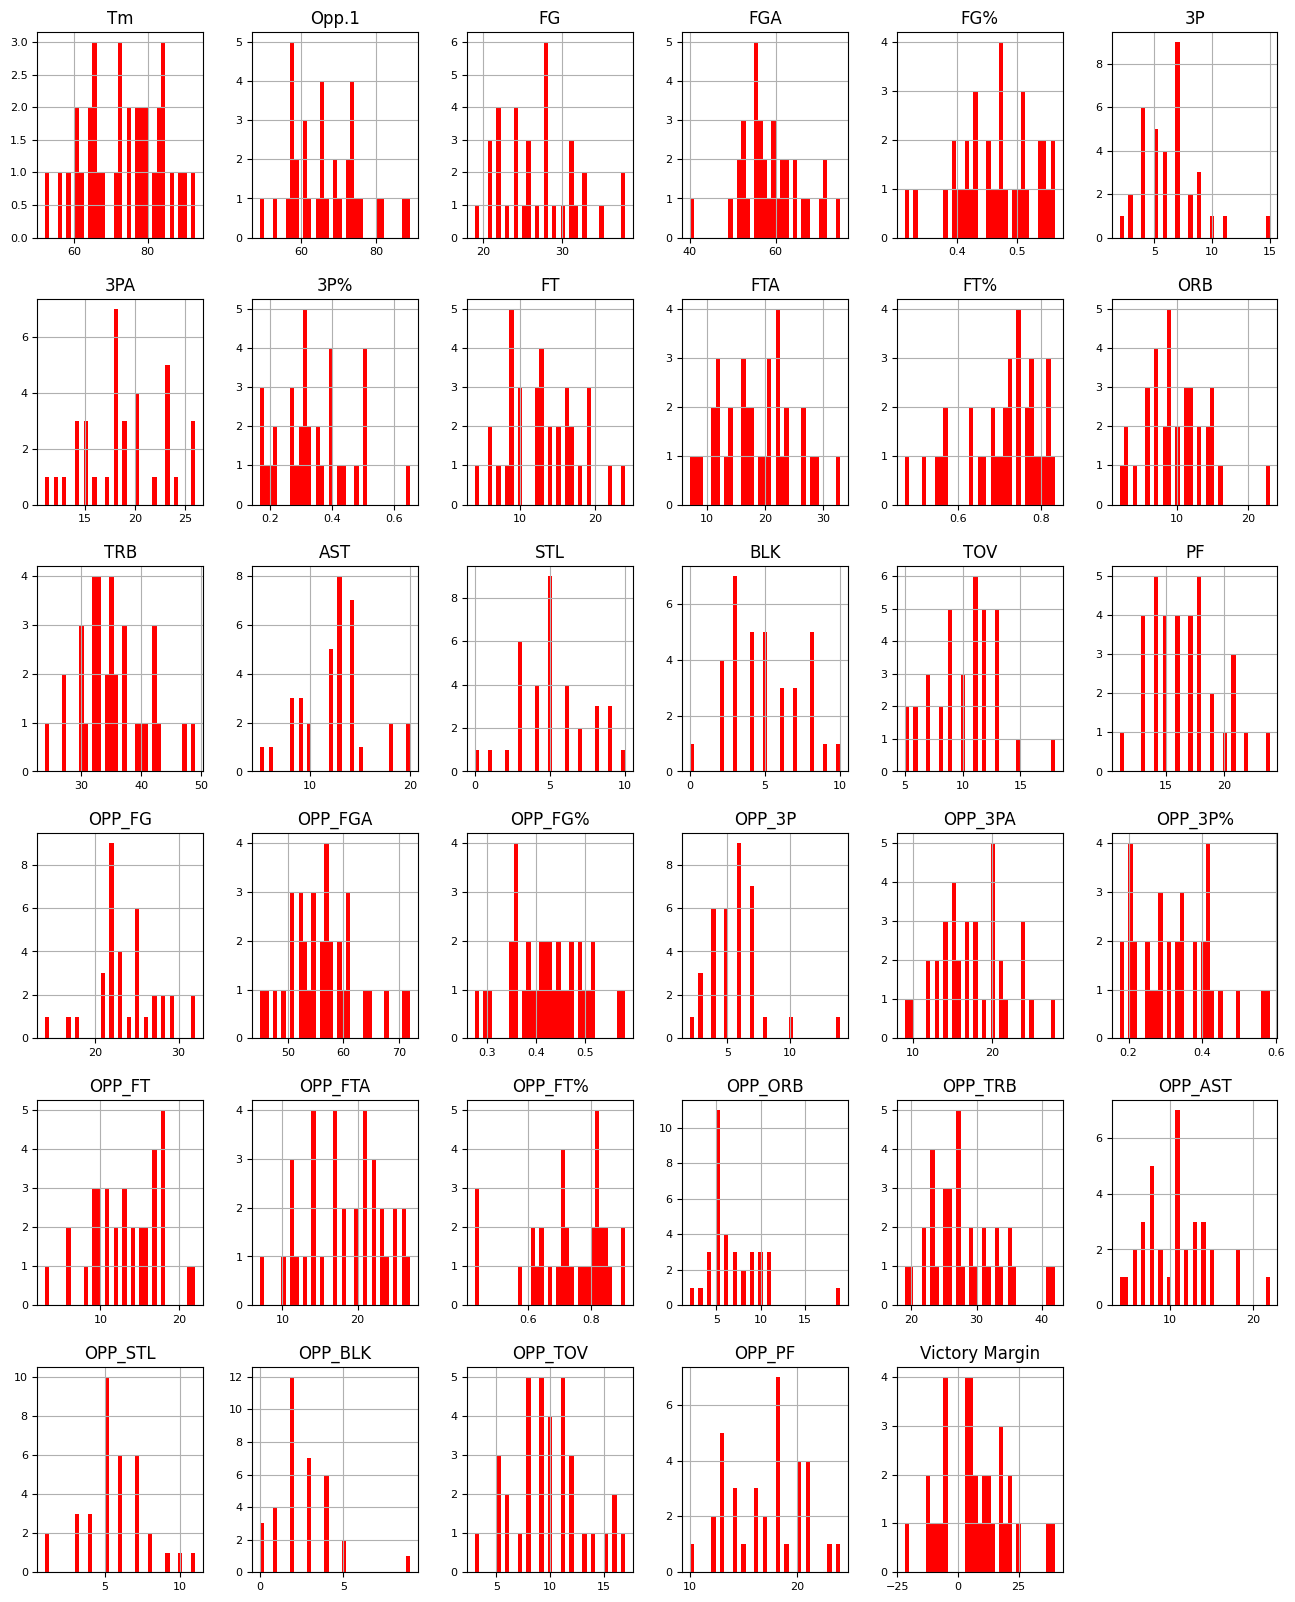

In [11]:
gamelog_nums = gamelog.select_dtypes(include = ['float64', 'int64'])
gamelog_nums.hist(figsize = (16, 20), bins = 35, xlabelsize = 8, ylabelsize = 8, color = 'red')

#### Import Data From Other Teams

Next lets import the data from other college basketball teams for reference.


In [12]:
#Function for cleaning and adding features
def clean_and_add_columns(gamelog):
    '''This function takes a dataframe and performs the previous cleaning
    steps outlined in this noteboom'''
    
    #clean
    gamelog.rename(columns = {'Unnamed: 2': 'Location'}, inplace = True)
    gamelog.drop(columns = ['Unnamed: 23'], inplace = True) #Column is empty and used for spacing

    #fix nan values in Location column
    gamelog['Location'] = gamelog['Location'].fillna('H')
    
    #add columns
    gamelog['Victory Margin'] = gamelog['Tm'] - gamelog['Opp.1']
    

In [13]:
#Import and Clean Data From other teams
kansas = pd.read_csv('Kansas_Gamelog.csv', index_col = 'G') #team with most basketball games played in their history (cougs are 2nd)
uconn = pd.read_csv('UConn_Gamelog.csv', index_col = 'G') #winner of the 2024 Men's NCAA tournament
uw = pd.read_csv('UW_gamelog.csv', index_col = 'G') #as a former husky (grad 2023) they put the 'dog' in 'dogshit' (sorry dad I'm a cougar now)

new_data = [kansas, uconn, uw]
for summary_df in new_data:
    clean_and_add_columns(summary_df)
    
kansas['Team'] = 'Kansas'
uconn['Team'] = 'UConn'
uw['Team'] = 'UW'

#### Compare Teams' Stats

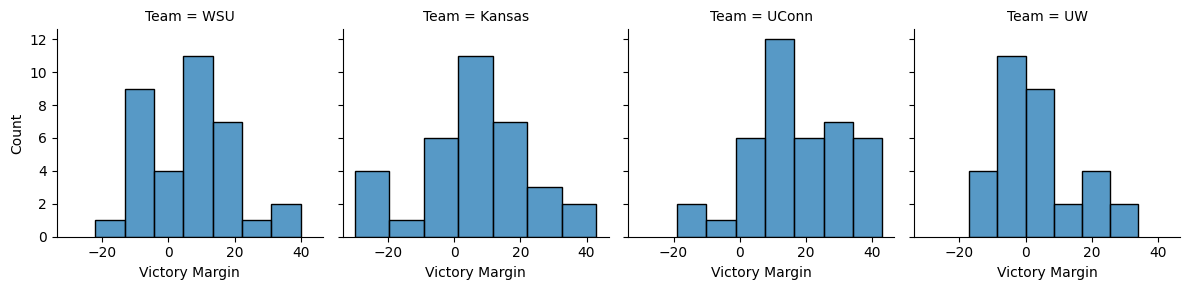

In [14]:
all_data = pd.concat([gamelog, kansas, uconn, uw], axis = 0)
g = sns.FacetGrid(all_data, col='Team')
g.map(sns.histplot, 'Victory Margin')  # Replace 'column_of_interest' with the column you want to compare
plt.show()

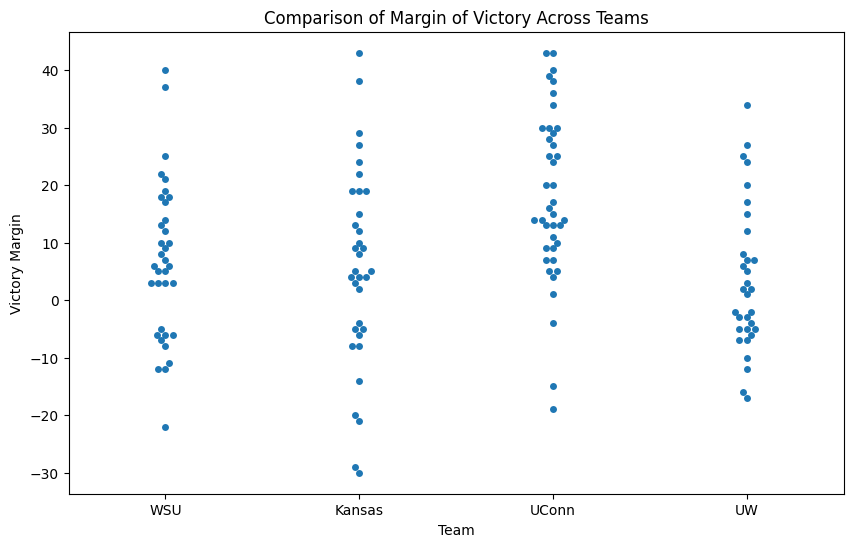

In [15]:
#swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x = 'Team', y = 'Victory Margin', data = all_data)
plt.title('Comparison of Margin of Victory Across Teams')
plt.show()

/var/folders/x7/08r503x15pz0twd7l5v9p7yh0000gn/T/ipykernel_25506/2784055069.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(summary_df.columns[1:], rotation = 90)
/var/folders/x7/08r503x15pz0twd7l5v9p7yh0000gn/T/ipykernel_25506/2784055069.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(summary_df.columns[1:], rotation = 90)
/var/folders/x7/08r503x15pz0twd7l5v9p7yh0000gn/T/ipykernel_25506/2784055069.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(summary_df.columns[1:], rotation = 90)
/var/folders/x7/08r503x15pz0twd7l5v9p7yh0000gn/T/ipykernel_25506/2784055069.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. afte

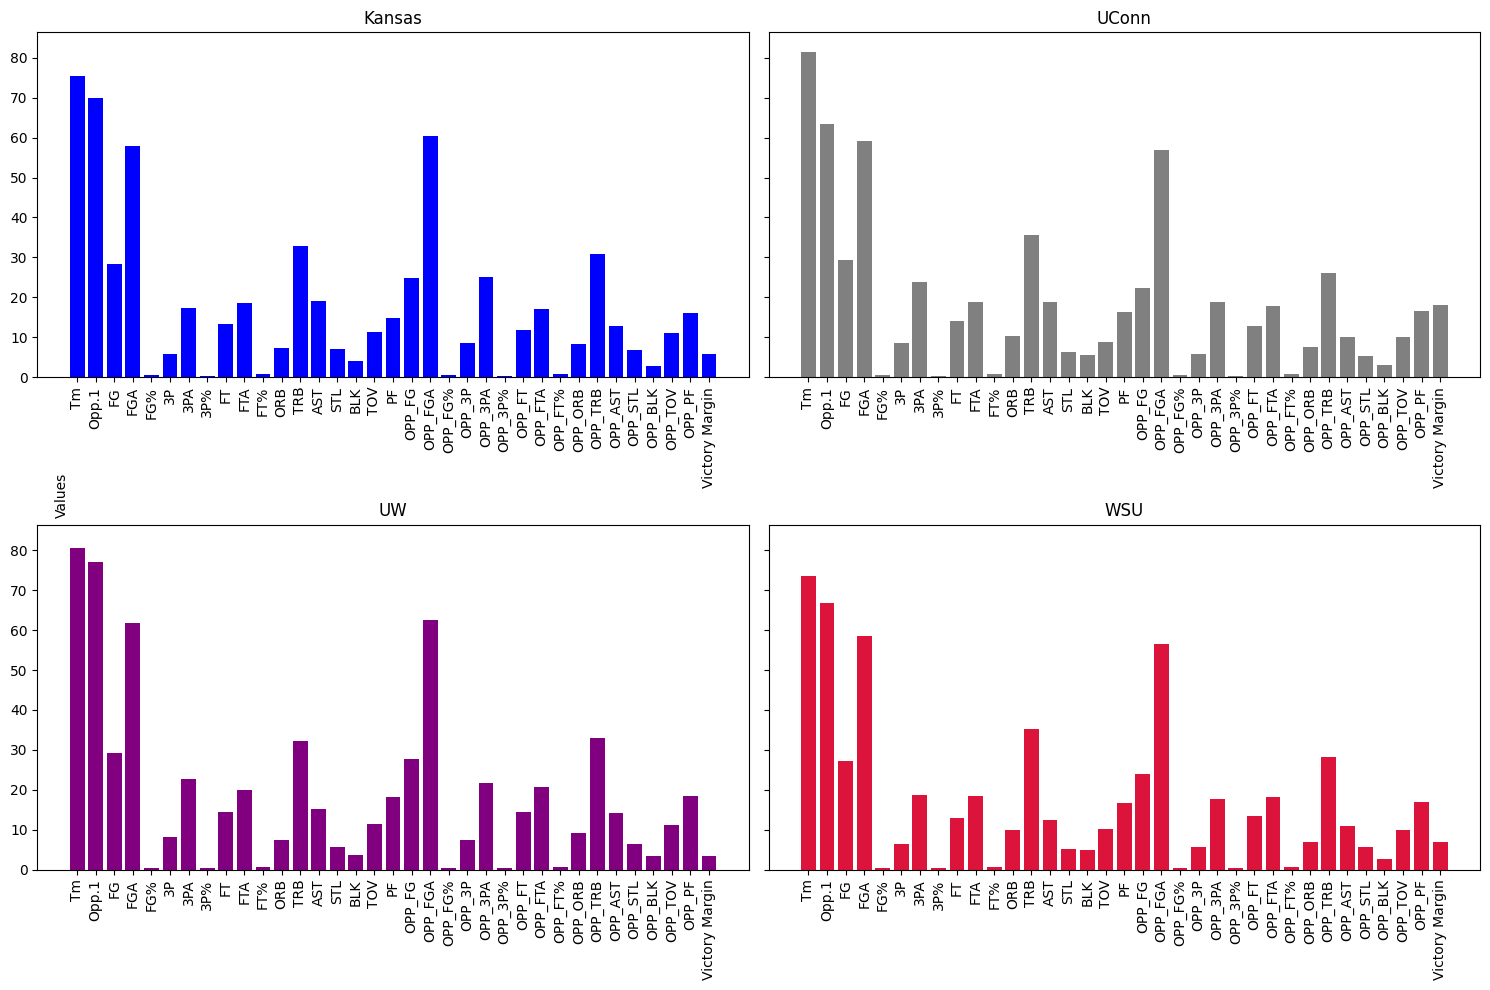

In [16]:
#Create DF of means
all_numeric = all_data.select_dtypes(include = ['float64', 'int64'])
all_numeric['Team'] = all_data['Team']
summary_df = all_numeric.groupby('Team').mean().reset_index()

# Determine the grid size for subplots (wrap after 2 charts)
num_teams = len(summary_df)
num_cols = 2
num_rows = int(np.ceil(num_teams / num_cols))

# Set up the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize = (15, 5 * num_rows), sharey = True)
axes = axes.flatten() 

# Colors for each team
colors = ['blue', 'grey', 'purple', 'crimson']

# Iterate through each team and create a bar plot
for i, (index, row) in enumerate(summary_df.iterrows()):
    axes[i].bar(summary_df.columns[1:], row[1:], color=colors[i])
    axes[i].set_title(row['Team'])
    axes[i].set_ylim(0, max(summary_df.max()[1:]) + 5)  # Adjust y-axis limit for consistency
    axes[i].set_xticklabels(summary_df.columns[1:], rotation = 90)

# Set a common y-axis label
fig.text(0.04, 0.5, 'Values', va='center', rotation='vertical')
plt.tight_layout()
plt.show()

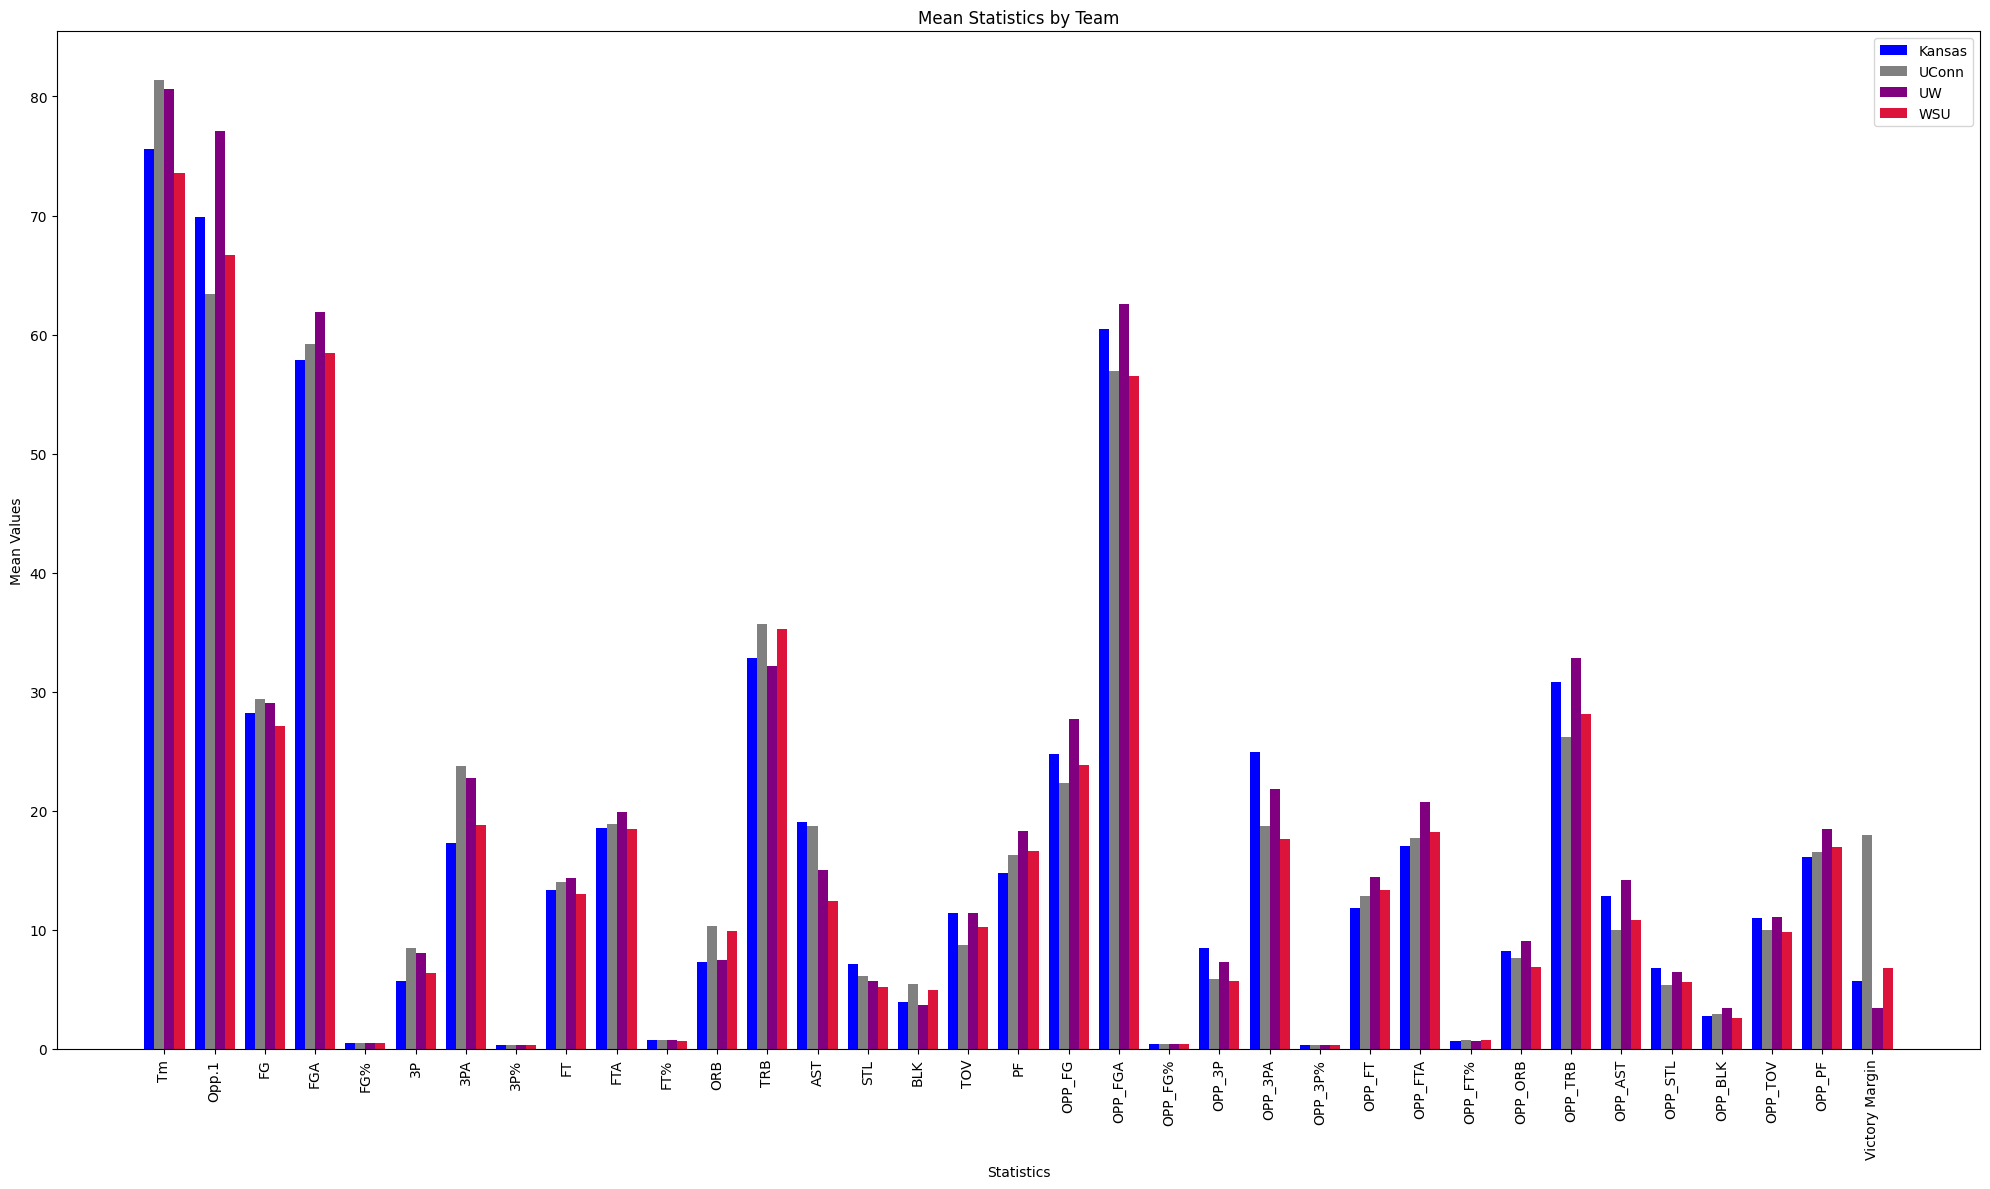

In [17]:
#Now all on the same chart

# Set up for grouped bar chart
categories = summary_df.columns[1:]  # ['points', 'assists', 'rebounds']
teams = summary_df['Team']
num_categories = len(categories)
num_teams = len(teams)

# Define the position of the bars on the x-axis
x = np.arange(num_categories)

# Width of a single bar
bar_width = 0.2

# Create the figure and axis
fig, ax = plt.subplots(figsize = (20, 12))

# Iterate through each team and plot the bars
for i, (index, row) in enumerate(summary_df.iterrows()):
    ax.bar(x + i * bar_width, row[1:], bar_width, label = row['Team'], color=colors[i])

# Add labels and title
ax.set_xlabel('Statistics')
ax.set_ylabel('Mean Values')
ax.set_title('Mean Statistics by Team')
ax.set_xticks(x + bar_width * (num_teams - 1) / 2)
ax.set_xticklabels(categories, rotation = 90)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

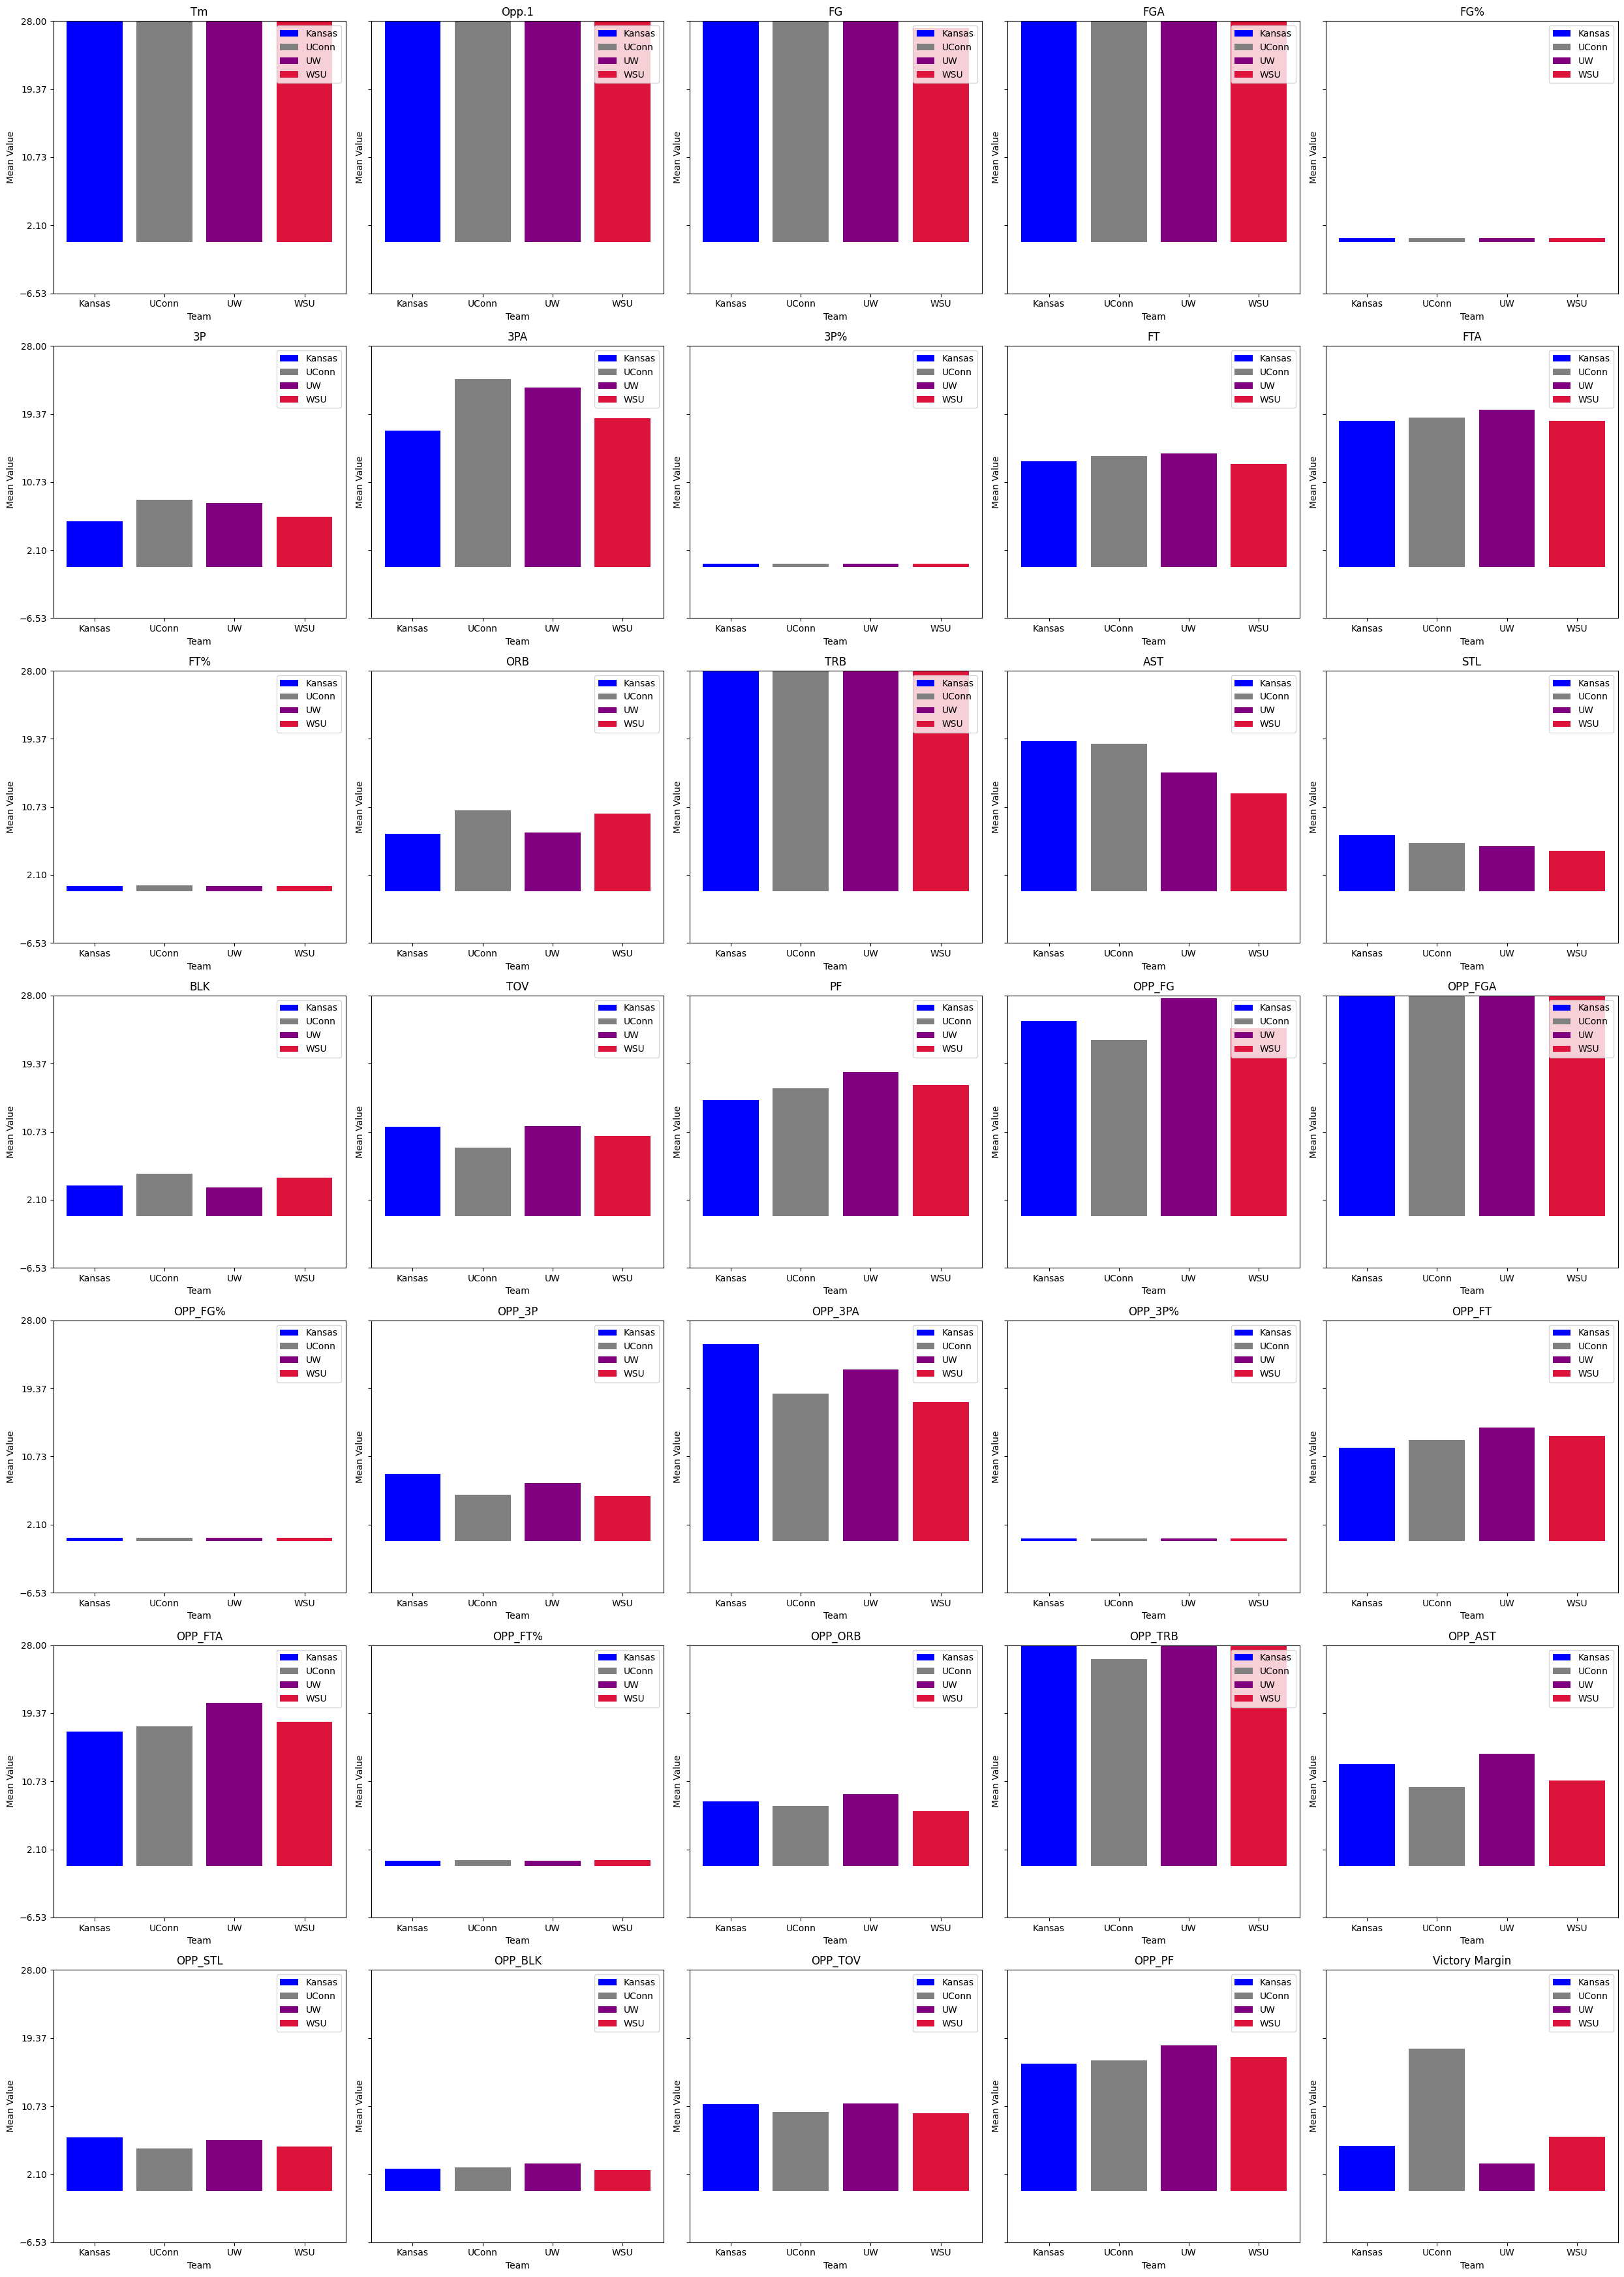

In [28]:
# Categories for stats
categories = summary_df.columns[1:]
teams = summary_df['Team'].unique()
num_categories = len(categories)

# Calculate number of rows needed for subplot grid with wrapping after every 5 charts
num_cols = 5
num_rows = int(np.ceil(num_categories / num_cols))

# Set up the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each category and create a bar plot
for i, category in enumerate(categories):
    for j, team in enumerate(teams):
        team_data = summary_df[summary_df['Team'] == team]
        mean_value = team_data[category].mean()
        axes[i].bar(team, mean_value, color=colors[j], label=team)
    
    axes[i].set_title(category)
    axes[i].set_xlabel('Team')
    axes[i].set_ylabel('Mean Value')  # Set y-axis label for each subplot
    
    # Calculate y-axis limits and ticks dynamically based on data range for each category
    category_data = summary_df[category]
    y_min = category_data.min() - 10
    y_max = category_data.max() + 10
    y_ticks = np.linspace(y_min, y_max, num=5)  # Adjust number of ticks as needed
    axes[i].set_ylim(y_min, y_max)  # Set y-axis limits for each subplot
    axes[i].set_yticks(y_ticks)  # Set y-axis ticks for each subplot
    
    axes[i].legend()

# Remove any unused subplots
for k in range(num_categories, len(axes)):
    fig.delaxes(axes[k])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()
